In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn import over_sampling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from lightgbm import LGBMClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project Rakamin/df_preprocessing_final_project.csv')
df.sample(5)

,Unnamed: 0,age,balance,day,duration,campaign,previous,y,marital_divorced,marital_married,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_segment,job_frequency,job_freq_percentage,job_freq_rank
17105,17105,26,79,9,346,3,0,0,0,1,...,0,1,0,0,0,1,q2,1487,3.289023,5.0
16604,16604,54,473,2,182,1,1,1,0,1,...,0,0,1,0,0,0,q4,7597,16.803433,10.0
30729,30729,82,0,6,381,3,1,0,1,0,...,0,0,1,0,0,0,q3,2264,5.007631,7.0
5608,5608,44,6285,20,136,3,2,0,1,0,...,0,0,0,1,0,0,q4,9458,20.919688,11.0
38567,38567,39,1601,21,219,2,2,0,0,1,...,0,0,1,0,0,0,q4,4154,9.188029,8.0


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df = pd.get_dummies(df)

In [ ]:
df.sample(5)

,age,balance,day,duration,campaign,previous,y,marital_divorced,marital_married,marital_single,...,poutcome_other,poutcome_success,poutcome_unknown,job_frequency,job_freq_percentage,job_freq_rank,month_segment_q1,month_segment_q2,month_segment_q3,month_segment_q4
16609,69,482,4,101,1,0,0,0,1,0,...,0,0,1,7597,16.803433,10.0,0,0,0,1
22100,57,4148,18,340,3,0,0,0,1,0,...,0,0,1,9732,21.525735,12.0,0,1,0,0
12124,51,43,30,220,2,0,0,1,0,0,...,0,0,1,7597,16.803433,10.0,0,0,1,0
19853,32,100,16,376,2,0,0,0,0,1,...,0,0,1,9732,21.525735,12.0,0,1,0,0
12270,36,594,4,230,3,0,0,0,1,0,...,0,0,1,7597,16.803433,10.0,0,0,1,0


# MODELING

# 1. A. Split Data Train and Data Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['y']), df['y'], test_size=0.2, random_state=42)

# Handle Imbalance Data With SMOTE

In [ ]:
x_smote, y_smote = over_sampling.SMOTE('all', random_state=42).fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=all as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
print('Original')
print(pd.Series(y_train).value_counts())
print('\nSMOTE')
print(pd.Series(y_smote).value_counts())

Original
0    31930
1     4238
Name: y, dtype: int64

SMOTE
0    31930
1    31930
Name: y, dtype: int64


# 1. B. Modeling

# Modeling : Random Forest

In [87]:
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [88]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_smote, y_smote)

eval_classification(rf, x_smote, y_smote, x_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.61
Recall (Test Set): 0.44
F1-Score (Test Set): 0.51
AUC: 0.91


# Modeling : Logistic Regresion

In [89]:
lr = LogisticRegression(random_state=42)
lr.fit(x_smote, y_smote)

eval_classification(lr, x_smote, y_smote, x_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.41
Recall (Test Set): 0.65
F1-Score (Test Set): 0.50
AUC: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Modeling : LGBM

In [90]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_smote, y_smote)

eval_classification(lgbm, x_smote, y_smote, x_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.61
Recall (Test Set): 0.50
F1-Score (Test Set): 0.55
AUC: 0.92


# 1. C. Model Evaluation: Pemilihan dan perhitungan metrics



* Tim kami berfokus kepada metric **F1-Score** karena ingin meningkatkan **False Negatif** dan mengurangi **False Positive** untuk meningkatkan angka nasabah yg berlangganan agar mendapatkan revenue, dan mengurangi kerugian.
* Melihat metric **AUC** untuk mendapatkan performa model yang tinggi
* Berdasarkan hasil perbandingan model diatas dengan mepertimbangan metrics, model **Light Gradient Boosting Machine** menjadi pilihan karena memiliki nilai **F1-Score cukup tinggi**, dan nilai **AUC yang tinggi**, serta **metric-metric lainnya yang lebih baik diantara model lainnya**.

# 1. D. Model Evaluation: Apakah model sudah best-fit?

* melakukan cross validation dengan menggunakan k=10

In [ ]:
np.mean(cross_val_score(lgbm, x_smote, y_smote, cv=10, scoring='f1'))

0.9029583092570149

# 1. E. Hyperparameter Tuning

In [ ]:
np.random.seed(42)
model = LGBMClassifier(random_state=42)

param_grid = {
    'boosting_type':['gbdt', 'dart', 'goss', 'rf'],
    'objective':['regression', 'binary', 'multiclass', 'lambdarank'],
    #'max_depth':np.arange(5,28),
    #'num_leaves':np.arange(5,20),
}

lgbmc = GridSearchCV(model, param_grid=param_grid, scoring='f1', cv=10)
lgbmc.fit(x_smote, y_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py", line 1552, in __init__
    train_set.construct().handle,
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py", line 1001, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/usr/local/lib/python3.7/dist-packages/light

GridSearchCV(cv=10, estimator=LGBMClassifier(random_state=42),
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'objective': ['regression', 'binary', 'multiclass',
                                       'lambdarank']},
             scoring='f1')

In [ ]:
eval_classification(lgbmc, x_smote, y_smote, x_test, y_test)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.95
Precision (Test Set): 0.59
Recall (Test Set): 0.55
F1-Score (Test Set): 0.57
AUC: 0.92


* Setelah menggunakan metode k-fold cross validation dengan nilai 'k'=10 untuk hyperparameter tuning, ternyata model tersebut tidak mengalami kenaikan, hanya mengalami sedikit kenaikan saja pada `F1-Score` dan tidak mengalami penurunan maupun kenaikan pada `ROC-AUC Score`. 

* Menandakan bahwa model hasil hyperparameter tuning **tidak overfitting maupun underfitting**.

In [ ]:
model2 = LGBMClassifier(random_state=42, boosting_type = 'gbdt', objective = 'binary' )
model2.fit(x_smote, y_smote)

LGBMClassifier(objective='binary', random_state=42)

# 2. Feature Importance

Text(0.5, 1.0, 'feature importance score')

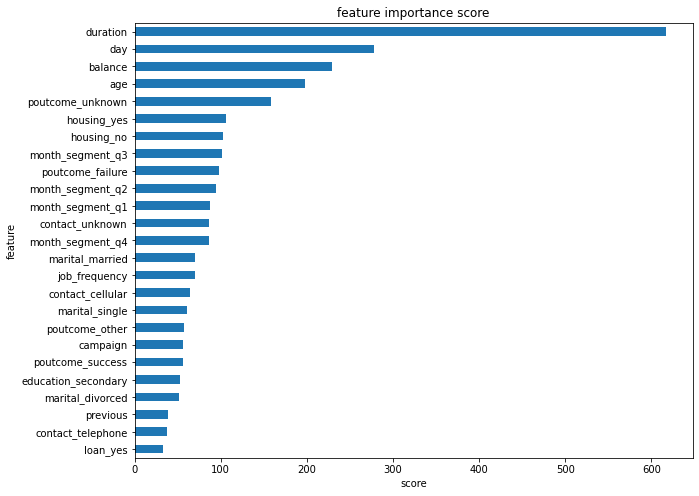

In [ ]:
feat_importances = pd.Series(lgbmc.best_estimator_.feature_importances_, index=x_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

* Dari feature importance tersebut dapat dilihat bahwa feature `duration` memiliki pengaruh paling tertinggi. 

* `duration` adalah panggilan terakhir oleh team marketing. 

* Dengan demikian untuk kedepannya kita dapat melakukan pendekatan terhadap nasabah yg akan dituju dengan persuasif.

In [ ]:
x_smote_2 = x_smote[['duration', 'balance', 'age', 'day', 'poutcome_unknown']]

In [ ]:
x_smote_2

,duration,balance,age,day,poutcome_unknown
0,314,4547,57,7,1
1,55,5848,39,19,1
2,236,0,48,6,1
3,530,-386,33,23,1
4,104,299,23,19,1
...,...,...,...,...,...
63855,417,719,47,11,1
63856,816,3865,56,15,1
63857,227,710,28,26,0
63858,460,21698,39,21,0


In [ ]:
x_test_2 = x_test[['duration', 'balance', 'age', 'day', 'poutcome_unknown']]

In [ ]:
x_test_2

,duration,balance,age,day,poutcome_unknown
3776,733,556,52,13,1
9928,80,78,43,15,1
33409,164,4320,41,18,0
31885,117,678,31,3,1
15738,240,-129,49,8,1
...,...,...,...,...,...
13353,91,296,35,22,1
38732,267,1534,37,30,1
5654,22,1945,53,21,0
3779,169,0,44,13,1


In [ ]:
df_fi = df[['duration', 'balance', 'age', 'day', 'poutcome_unknown','y']].copy()
df_fi.sample(5)

,duration,balance,age,day,poutcome_unknown,y
9777,10,2576,40,12,1,0
39006,651,292,30,15,1,0
17239,126,283,39,26,1,0
34008,269,788,34,5,1,0
5724,661,2058,44,21,1,0


In [ ]:
x_fi_train, x_fi_test, y_fi_train, y_fi_test = train_test_split(
    df_fi.drop(columns=['y']),
    df_fi['y'],
    test_size=0.2,
    random_state=42
)

In [ ]:
x_fi_smote, y_fi_smote = over_sampling.SMOTE('all', random_state=42).fit_resample(x_fi_train, y_fi_train)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=all as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
np.random.seed(42)
model = LGBMClassifier(random_state=42)

param_grid = {
    'boosting_type':['gbdt', 'dart', 'goss', 'rf'],
    'objective':['regression', 'binary', 'multiclass', 'lambdarank'],
}

lgbmc_fi = GridSearchCV(model, param_grid=param_grid, scoring='f1', cv=10)
lgbmc_fi.fit(x_fi_train, y_fi_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py", line 1552, in __init__
    train_set.construct().handle,
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py", line 1001, in construct
    categorical_feature=self.categorical_feature, params=self.params)
  File "/usr/local/lib/python3.7/dist-packages/light

GridSearchCV(cv=10, estimator=LGBMClassifier(random_state=42),
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'objective': ['regression', 'binary', 'multiclass',
                                       'lambdarank']},
             scoring='f1')

In [ ]:
y_fi_pred_train = lgbmc_fi.predict(x_fi_train)
y_fi_pred_test = lgbmc_fi.predict(x_fi_test)
hasil = {
    'data':['train', 'test'],
    'accuracy':[accuracy_score(y_fi_train, y_fi_pred_train), accuracy_score(y_fi_test, y_fi_pred_test)],
    'precision':[precision_score(y_fi_train, y_fi_pred_train), precision_score(y_fi_test, y_fi_pred_test)],
    'recall':[recall_score(y_fi_train, y_fi_pred_train), recall_score(y_fi_test, y_fi_pred_test)],
    'F1':[f1_score(y_fi_train, y_fi_pred_train), f1_score(y_fi_test, y_fi_pred_test)],
    'roc_auc':[roc_auc_score(y_fi_train, y_fi_pred_train), roc_auc_score(y_fi_test, y_fi_pred_test)],
}
df_hasil = pd.DataFrame(hasil)

In [ ]:
print('best params : ', lgbmc_fi.best_params_)
df_hasil

best params :  {'boosting_type': 'gbdt', 'objective': 'binary'}


,data,accuracy,precision,recall,F1,roc_auc
0,train,0.907155,0.695209,0.369750,0.482748,0.674117
1,test,0.892514,0.571429,0.300666,0.394015,0.635506


Setelah dilakukan iterasi model dan dievaluasi kembali. Hasilnya menunjukan bahwa model iterasi ini tidak mengalami **overfitting** yang dapat dilihat dari nilai accuracy, F1, dan roc_auc yang tidak terlalu signifikan. Dengan demikian **model hasil iterasi tidak lebih baik dari model semula**